<a href="https://www.kaggle.com/code/hazmannaim/pulsars-candidate-classification-simple-ml?scriptVersionId=146497761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Title: Identifying Pulsar Candidates through Machine Learning Classification with Ensemble Methods

------

# Introduction
## Problem Statement
Pulsars, or rotating neutron stars, are incredibly dense celestial objects that emit regular pulses of radiation. Identifying these pulsars is a crucial task in astrophysics, aiding our understanding of the universe. The process of sifting through a pool of pulsar candidates is not only time-consuming but also prone to human errors. The traditional methods for identifying pulsars are inefficient and may overlook potential discoveries. To address this issue, we aim to leverage machine learning and ensemble methods to enhance the accuracy of pulsar candidate classification.

## Objectives
1. Data Collection and Preparation:

- Gather a comprehensive dataset of pulsar candidates and relevant astrophysical features.
- Preprocess the data, including handling missing values, duplicates and standardization, to create a high-quality dataset for training and testing the machine learning models.

2. Model Selection and Development:

- Explore various machine learning classification algorithms, including logistic regression, random forests,and gradient boosting algorithms.
- Develop and train machine learning models on the prepared dataset.
- Experiment with ensemble methods to combine the strengths of multiple models for improved classification accuracy.

3. Model Evaluation and Optimization:

- Evaluate the performance of the developed models using appropriate metrics such as accuracy, precision, recall, F1 score and log loss.
- Optimize the models through hyperparameter tuning to maximize their ability to accurately classify pulsar candidates.
- Assess the models' generalization performance through cross-validation and ensure their robustness in classifying unseen data.

<div style="display: flex; justify-content: center;">
    <div style="margin: 10px;">
        <img src="https://th.bing.com/th/id/R.5cead84a619f1242064594e24eac3e36?rik=GOiYHgnR5OlgAw&riu=http%3a%2f%2feinstein.phys.uwm.edu%2fradiopulsar%2fhtml%2fimg%2frotns.gif&ehk=ICe4a1zB0y9xux%2f1SYwMEdstB4t80GLEG0ocDPmKEiQ%3d&risl=&pid=ImgRaw&r=0" width="215px" />
        <figcaption>Image 1: Animation of pulsar.</figcaption>
    </div>
    <div style="margin: 10px;">
        <img src="https://forcetoknow.com/wp-content/uploads/2012/02/Pulsar_forcetoknow.com_.jpg" width="250px" /> 
        <figcaption>Image 2: Artist rendering of pulsar.</figcaption>
    </div>
</div>


## What are we even looking at ?

<div style="display: flex; justify-content: center;">
    <div style="margin: 10px;">
        <img src="https://th.bing.com/th/id/OIP.F0xd5BFfZZio8tErMlZk9wHaJa?pid=ImgDet&w=2666&h=3386&rs=1" width="340px" />
        <figcaption>Image 3: Dispersion Curve of Pulsar.</figcaption>
    </div>
    <div style="margin: 90px;">
        <img src="https://pa0ply.nl/images/psr23f.jpg" width="350px" /> 
        <figcaption>Image 4: DM-SNR Curve of Pulsar.</figcaption>
    </div>
</div>

## The dataset we are working with comprises the actual features extracted from the Dispersion Curve (integrated profile) and DM-SNR of pulsars.

<div style="text-align:center">
  <img src="https://allofyourbases.files.wordpress.com/2019/03/pulsar_features.png?w=1024" width="500px" />
</div>

----

# 1. Prerequisites, Libraries and Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import set_config

# 2. Data Preparation

In [3]:
# Dataset for training the model
df = pd.read_csv(r'/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv') 

Check the header both for the `df` datasets.

In [4]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Explaining the features in the data:

**Mean_Integrated**: This is the mean integrated pulse profile, which measures the average intensity of a pulsar's signal over a period of time.

**SD**: This is the standard deviation of the integrated pulse profile, which measures the degree of variation in the intensity of the pulsar's signal.

**EK**: This is the excess kurtosis of the integrated pulse profile, which measures the "peakedness" of the distribution of intensities.

**Skewness**: This measures the degree of asymmetry in the distribution of intensities in the integrated pulse profile.

**Mean_DMSNR_Curve**: This is the mean of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**SD_DMSNR_Curve**: This is the standard deviation of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**EK_DMSNR_Curve**: This is the excess kurtosis of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**Skewness_DMSNR_Curve**: This measures the degree of asymmetry in the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

In [5]:
print("Dataset")
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

Dataset
(17898, 9)
Number of rows: 17898
Number of columns: 9


# 3. Exploratory Data Analysis

## 3.1 Data Cleaning

Overview of the descriptive statistics of the data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
SD,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
EK,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean_DMSNR_Curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
SD_DMSNR_Curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
EK_DMSNR_Curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness_DMSNR_Curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
Class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


**Integrated Profile**

This curve seems to be a normal distribution. which is symmetric about the mean and regular thickness of tails

1. **Mean** : Since mean is close to 50% mark and 25% and 75% are within 1 std. dev. from the mean. Large difference between min and max, hence larger std. dev. Hence the mean of the integrated profile seems volatile with a large standard deviation.

2. **Std. Dev** : Since mean is close to 50% mark and 25% and 75% are within less than 1 std. dev. from the mean, this data is normally distributed. The max and min values are 3-4 standard deviations from the mean.

3. **Excess Kurtosis** : Majority of this data (atleast 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. This means the integrated profile's tails are generally the same size as normal distributions.

4. **Skewness** : Majority of this data (definitely more 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. Hence the integrated profile must not be very skewed.

**DM-SNR Curve**

This curve is expected to be more highly spread than a normal distribution, and skewed towards the right of the mean.

1. **Mean** : Standard deviation of the mean is very high, with more than 75% values being less than mean. Hence mean of most curves are small

2. **Std. Dev** : Very skewed towards the higher side. Can expect most values to have standard deviation lower than 28. However, comparing this with the distribution of DM-SNR curve, which is mostly less than 5. This is a very highly spread DM-SNR curve.

3. **Excess Kurtosis** : This is normally distributed since mean = 50% value and every 25% is approx one std. dev. However, these values are high, hence the DM-SNR curve has fatter tails than normal distribution.

4. **Skewness** : Very high values, and high standard deviation. Hence the DM-SNR curve is very skewed (expected)

Check missing values and the data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

* Dataset contains only numerical features.

* Dataset contain no missing values.

Check duplicates in the data.

In [9]:
df.duplicated().sum()

0

No duplicates in our dataset.

Our dataset appears to be sufficiently clean. One possible explanation is that the original dataset was cleaned by professionals before being archived. Let’s now examine the distribution of the data.

## 3.2 Data Distribution

Check the distribution between pulsar and non-pulsar.

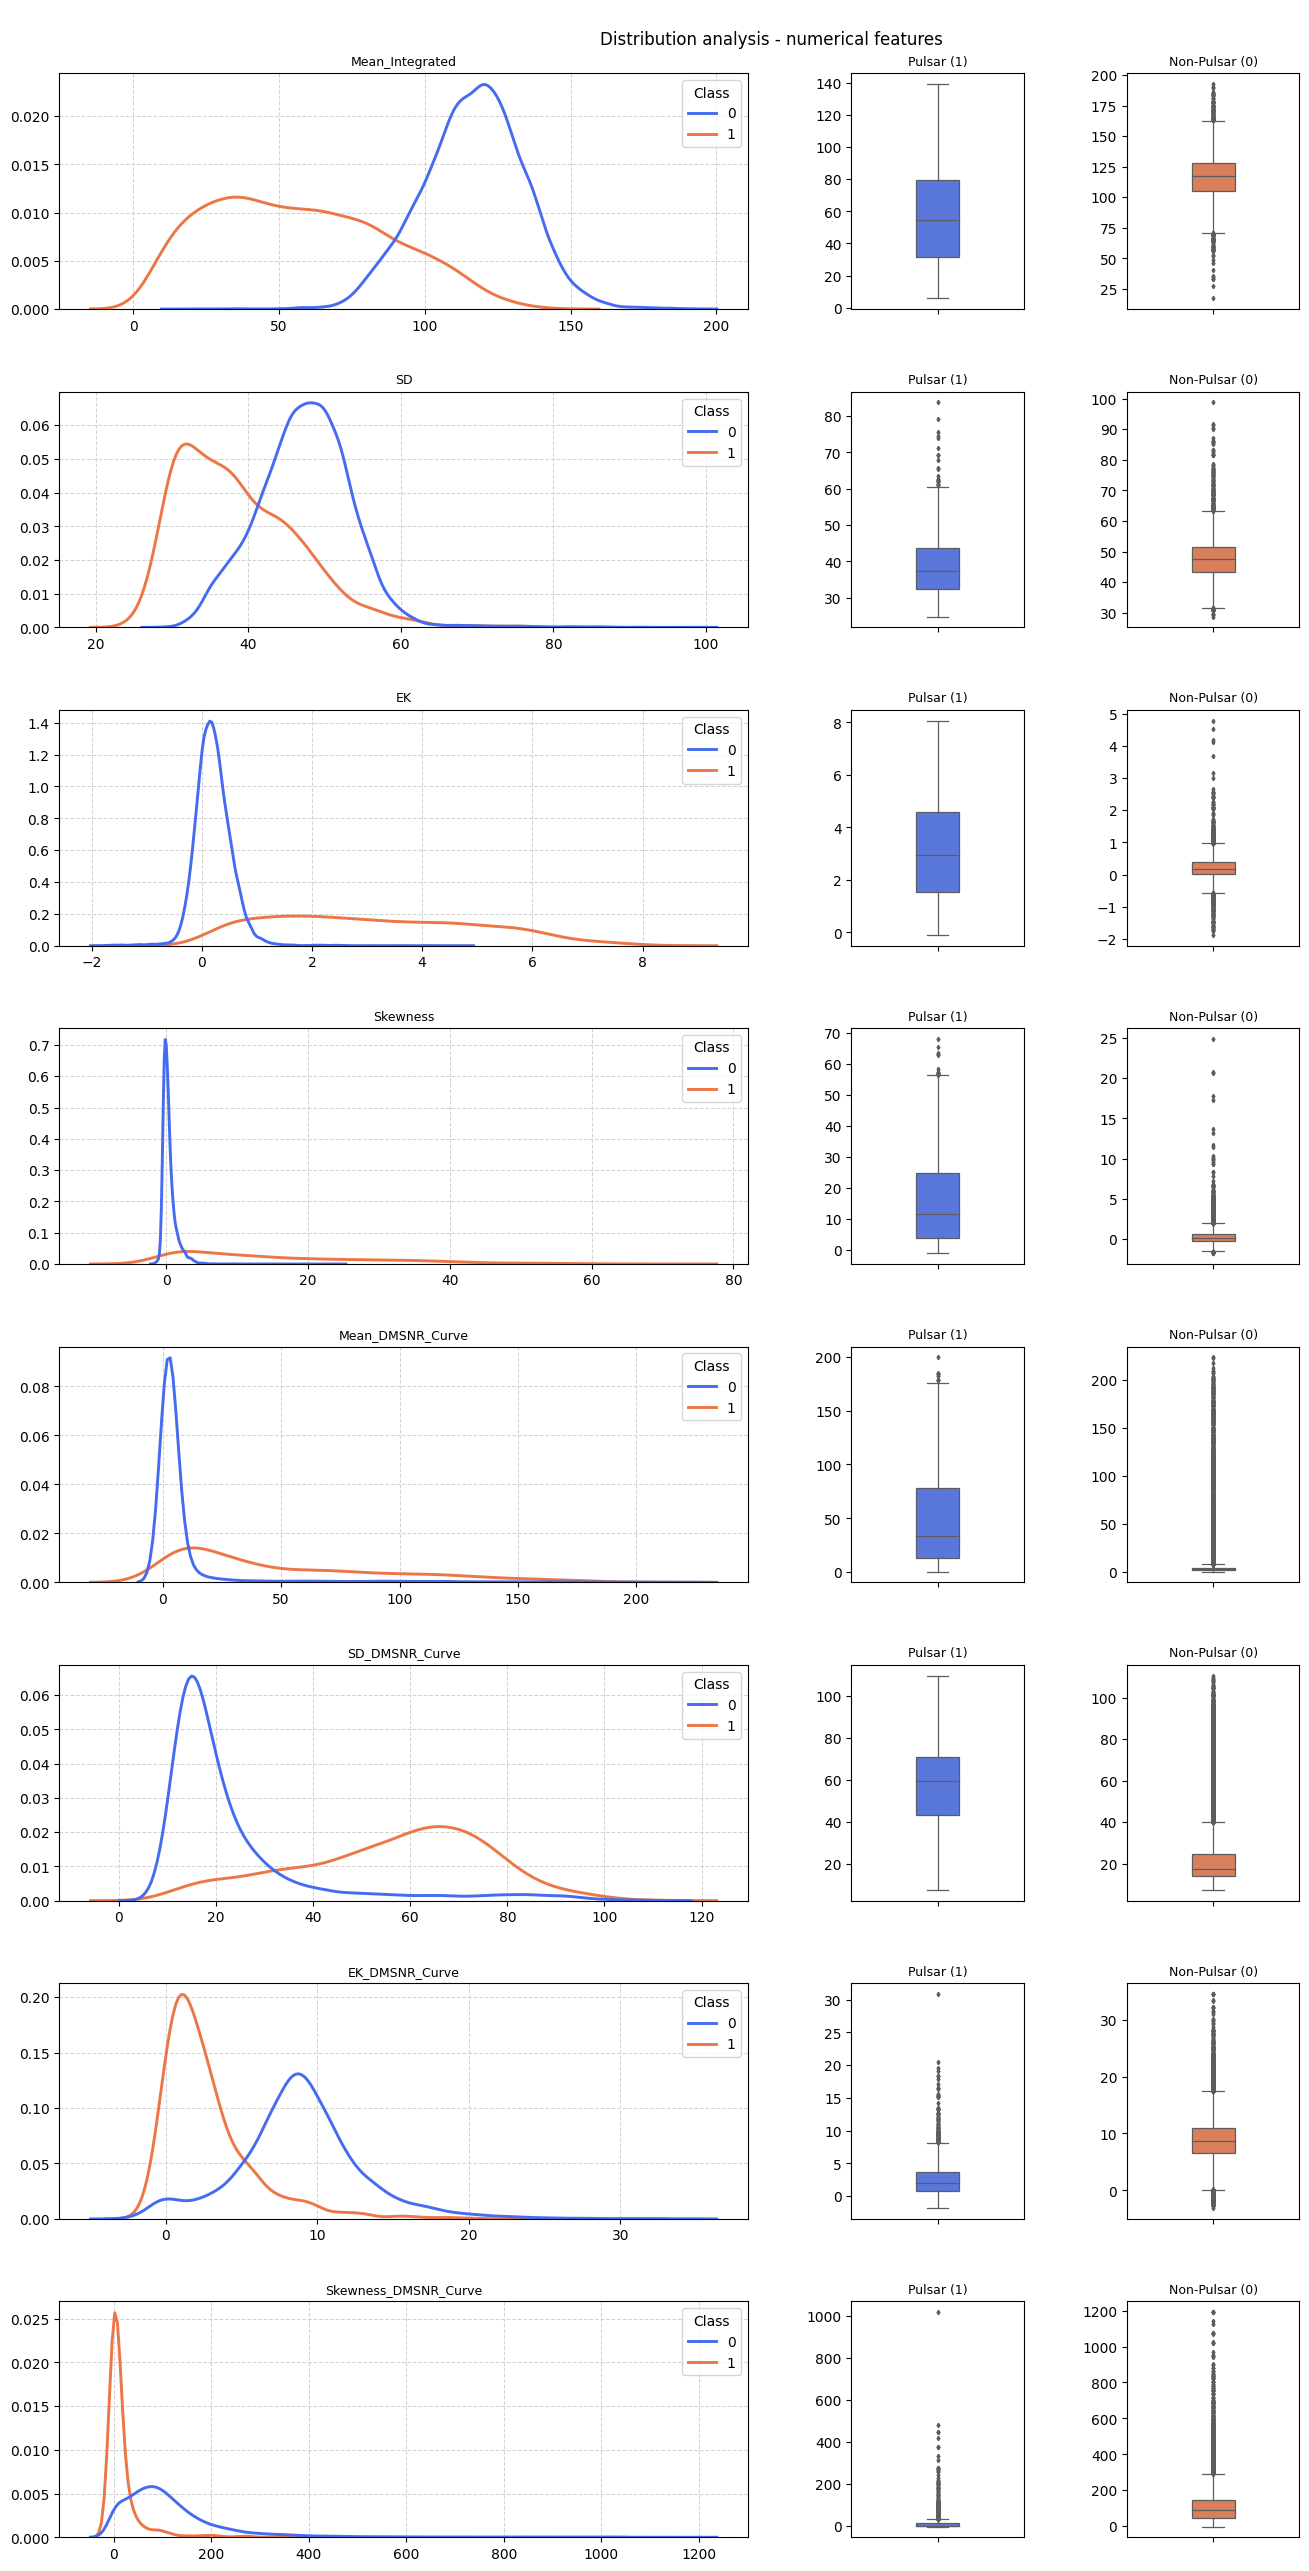

In [10]:
# dash by YANG ZHOU

num = df.select_dtypes(include=['int64','float64']).columns
num = num[:-1]

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data=df, x=col, hue='Class', palette=['#456cf0', '#ed7647'], linewidth=2.1, common_norm=False, ax=ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df[df['Class'] == 1], y=col, width=0.25, linewidth=0.90, fliersize=2.25, color='#456cf0', ax=ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Pulsar (1)", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data=df[df['Class'] == 0], y=col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Non-Pulsar (0)", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

* Class 1 are for high values of EK, Skewness, Mean_DMSNR_Curve and Mean_DMSNR_Curve
* Class 1 and Class 0 are separated

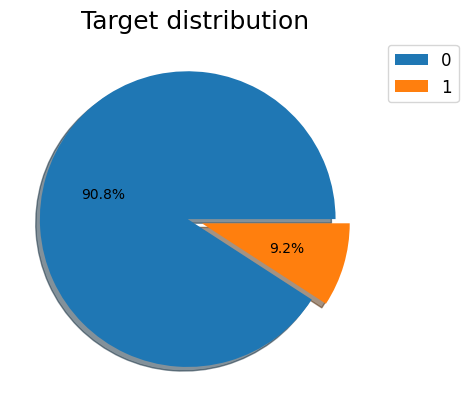

<Figure size 500x1000 with 0 Axes>

In [11]:
target_dist = df['Class'].value_counts()

plt.pie(target_dist, shadow=True, explode=[.05,.05], autopct='%.1f%%')

plt.title('Target distribution', size=18)
plt.legend(target_dist.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.figure(figsize=(5,10))

plt.show()

In [124]:
df['Class'].value_counts()

Class
0    16259
1     1639
Name: count, dtype: int64

We can see above that the class distribution is quite unbalanced: about 9% of the candidates are pulsar.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


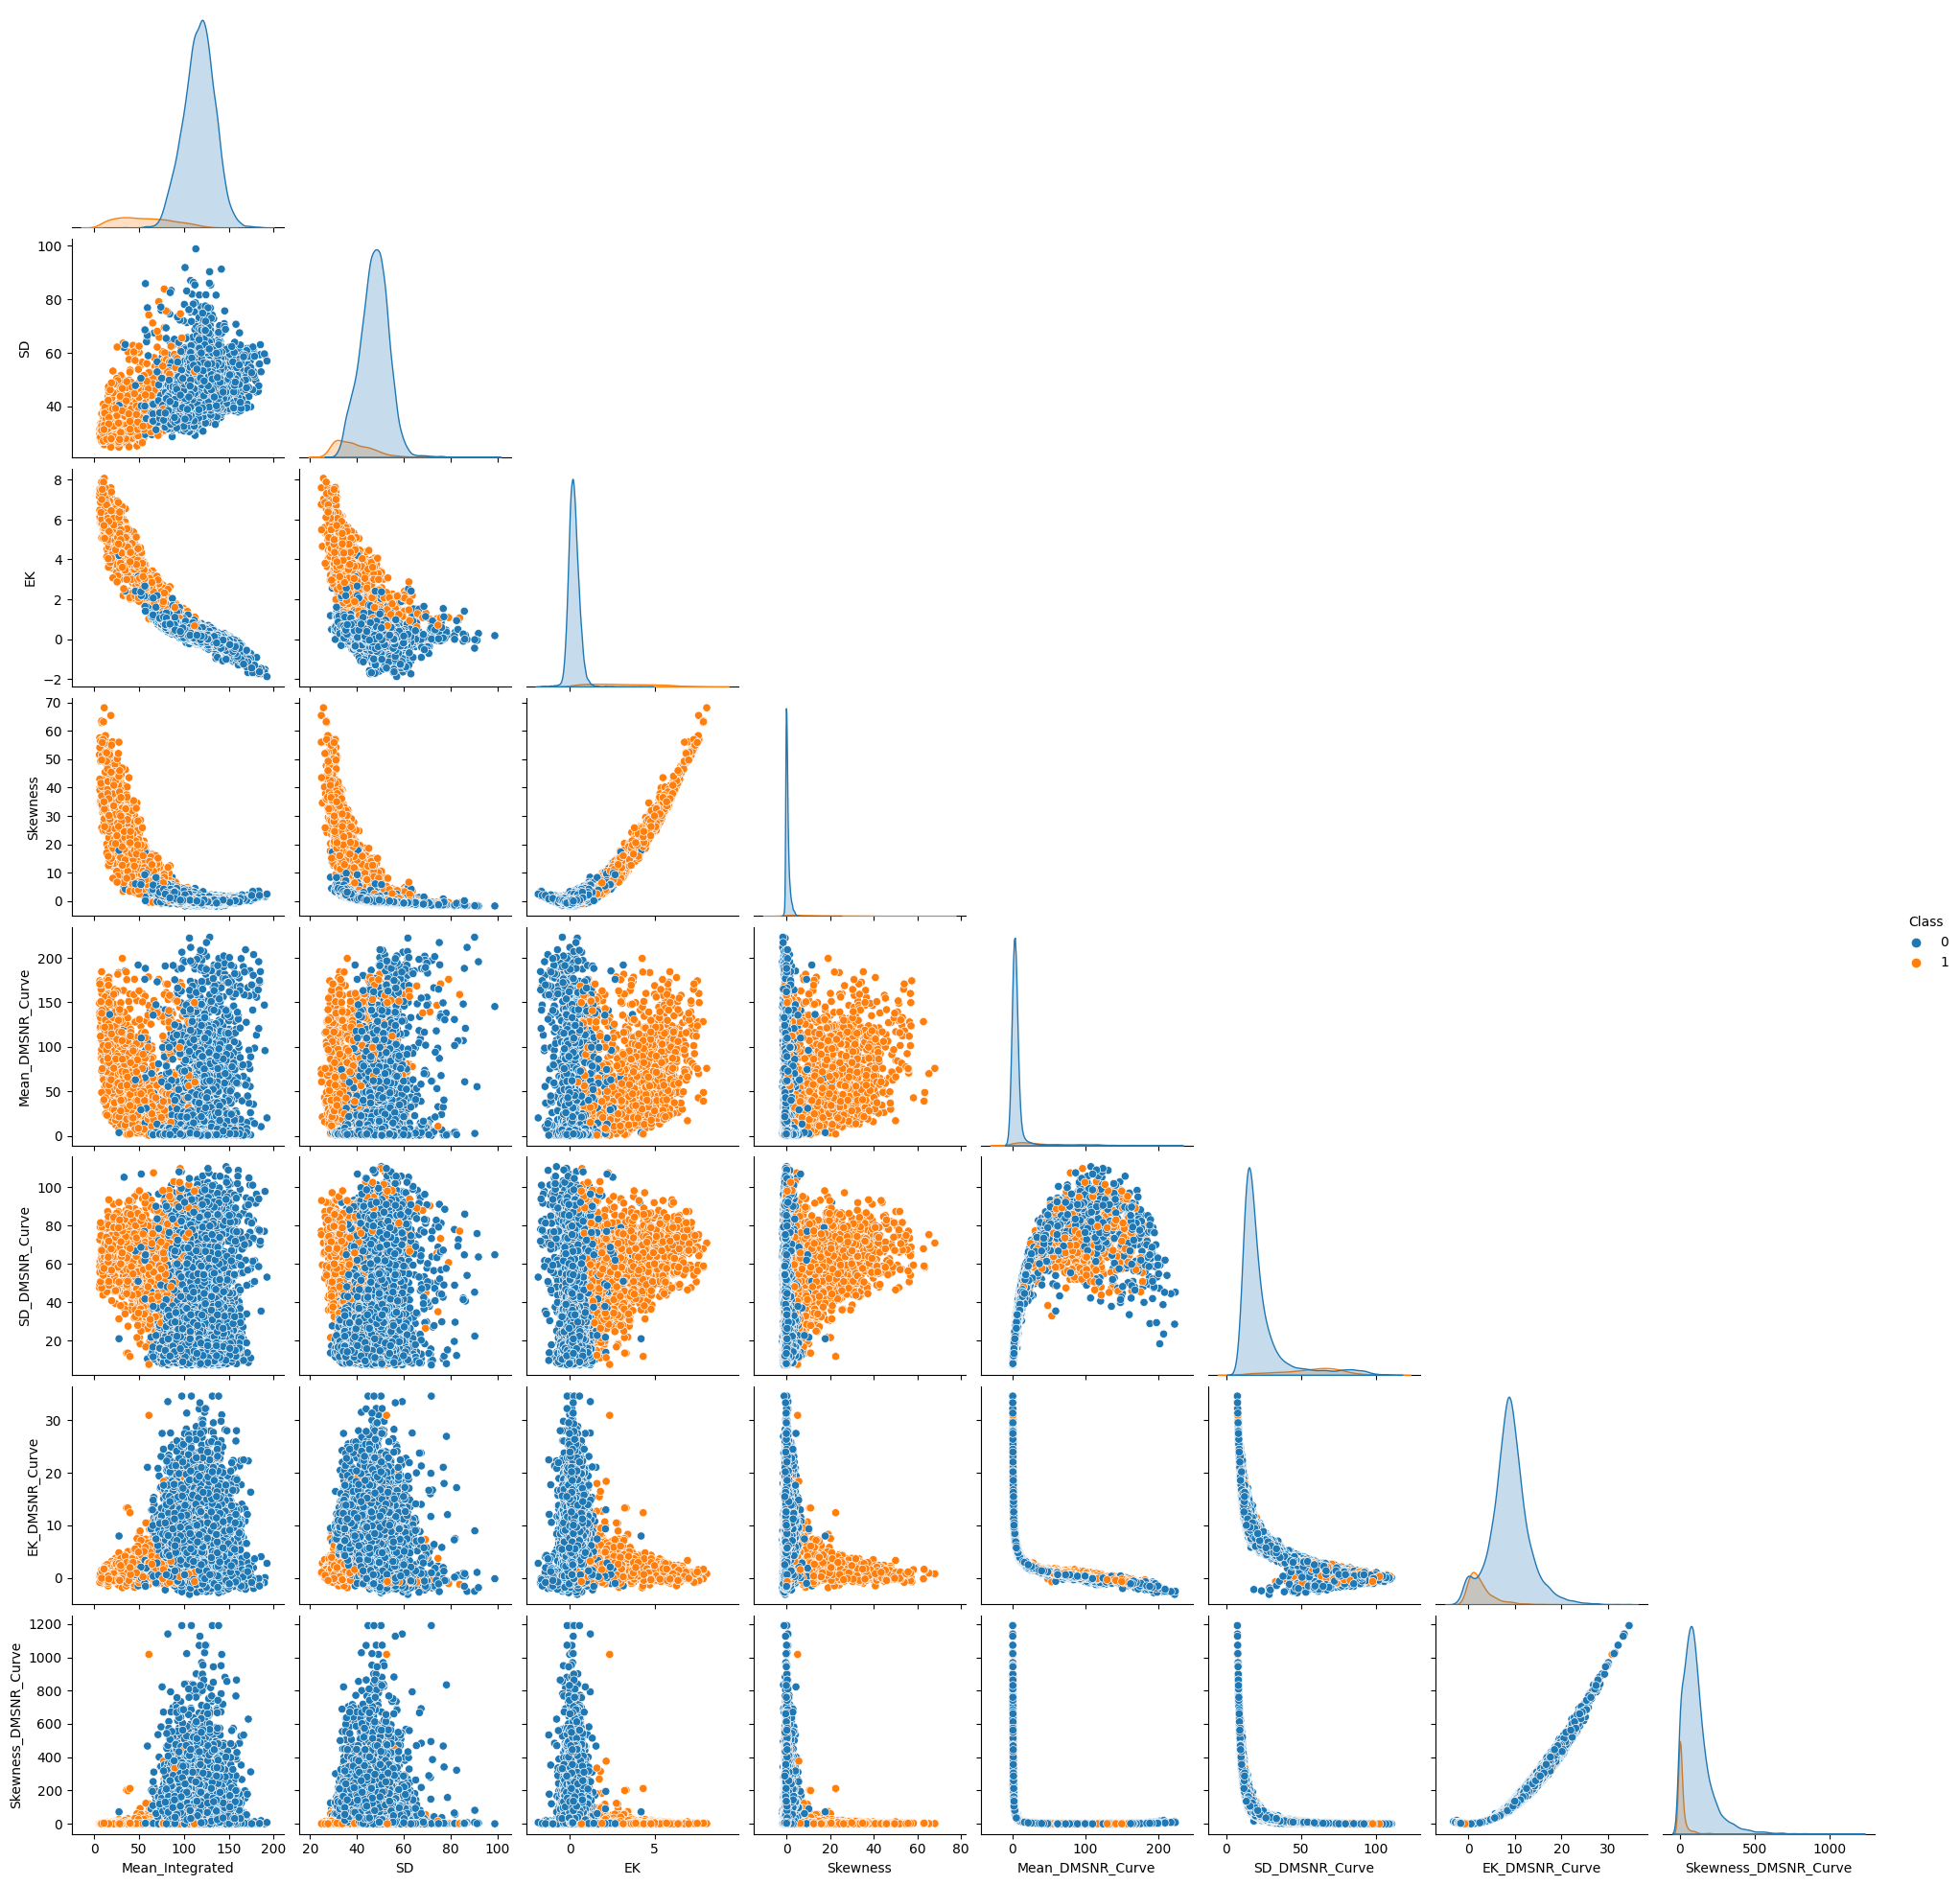

In [12]:
g = sns.pairplot(df,hue='Class',corner=True)

**Correlation and Collinearity**

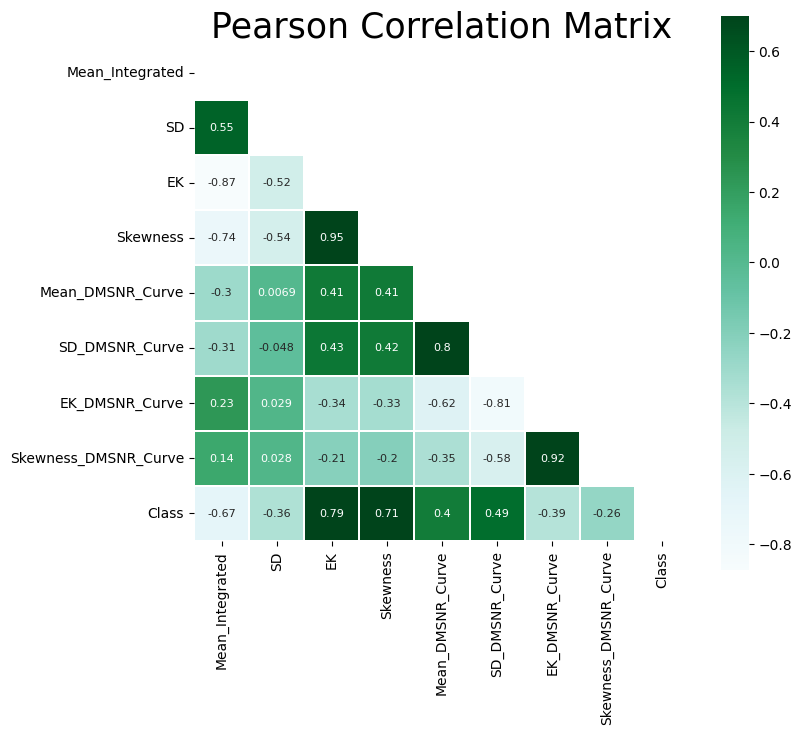

In [14]:
mask = np.zeros_like(df.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

**Correlations between 2 dependent variables**

**Highly positively correlated:**

* Skewness of the integrated profile and Excess kurtosis of the integrated profile
* Skewness of the DM-SNR curve and Excess kurtosis of the DM-SNR curve
* Mean the DM-SNR curve and Standard Deviation of the DM-SNR curve

**Highly negatively correlated:**

* Mean of the integrated profile and Excess kurtosis of the integrated profile
* Mean of the integrated profile and Skewness of the integrated profile
* Excess kurtosis the DM-SNR curve and Standard Deviation of the DM-SNR curve

**Correlations between independent and dependent variable**

**Highly positively correlated:**

* Excess kurtosis of the integrated profile
* Skewness of the integrated profile

**Highly negatively correlated:**

* Mean of the integrated profile

## 3.3 Standardization

* **StandardScaler** follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. $$z = \frac{x - \mu}{\sigma}$$
* **MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. $$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.

* By using **RobustScaler()**, we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. $$z_i = \frac{x_i - \text{median}(x)}{\text{IQR}(x)}$$



In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

num_features = ['Mean_Integrated',
                'SD',
                'EK',
                'Skewness',
                'Mean_DMSNR_Curve',
                'SD_DMSNR_Curve',
                'EK_DMSNR_Curve',
                'Skewness_DMSNR_Curve']

# Create a pipeline to first apply RobustScaler and then MinMaxScaler
preprocessing_pipeline = Pipeline([
    ('robust_scaling', RobustScaler()),
    ('minmax_scaling', MinMaxScaler())
])

# Create a column transformer using the pipeline for numeric features
transformer = ColumnTransformer(
    transformers=[('num', preprocessing_pipeline, num_features)],
    remainder="passthrough"
)

In [17]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robust_scaling',
                                                  RobustScaler()),
                                                 ('minmax_scaling',
                                                  MinMaxScaler())]),
                                 ['Mean_Integrated', 'SD', 'EK', 'Skewness',
                                  'Mean_DMSNR_Curve', 'SD_DMSNR_Curve',
                                  'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'])])

## 3.4 Data Balancing

To overcome the imbalanced dataset issue, we need to balance the data before applying any machine learning algorithm. Balancing the data means adjusting the class distribution so that each class has a similar number of samples. There are different methods to achieve this, such as:
* Oversampling
* Undersampling

In this project, I will be using SMOTETomek algorithm to oversample the minority class.

<div style="text-align:center">
  <img src="https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/08/10-oversampling.png?resize=613%2C324&ssl=1" width="500px" />
</div>

In [22]:
x_sampling = df.drop('Class',axis=1)
y_sampling = df['Class'].values

In [23]:
from imblearn.combine import SMOTETomek

smo = SMOTETomek(random_state=0)
x_res , y_res = smo.fit_resample(x_sampling,y_sampling)
SMOTETomek = (x_res , y_res)

In [25]:
print("Original dataset shape:", y_sampling.shape)
print("Resampled dataset shape: ", y_res.shape)

Original dataset shape: (17898,)
Resampled dataset shape:  (32246,)


accuracy score 0.9668217054263566
train_score : 0.9831845904689708
test_score : 0.9668217054263566
              precision    recall  f1-score   support

  Non Pulsar       0.96      0.98      0.97      1594
      Pulsar       0.98      0.96      0.97      1631

    accuracy                           0.97      3225
   macro avg       0.97      0.97      0.97      3225
weighted avg       0.97      0.97      0.97      3225



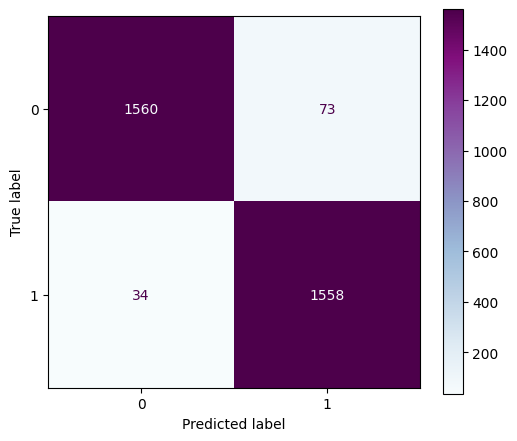

In [32]:
from sklearn.model_selection import train_test_split
from sklearn .metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size=0.1, random_state = 0)

model_smo = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier())
])

model_smo.fit(x_train,y_train)
y_pred = model_smo.predict(x_test)

train_score = model_smo.score(x_train , y_train)
test_score = model_smo.score(x_test , y_test)

print("accuracy score",accuracy_score(y_test, y_pred))
print("train_score :",train_score)
print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
confusion_matrix = metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

My approach involved oversampling the minority class to create a more balanced dataset. From the first test on the oversampled dataset, my model's accuracy currently stands at an impressive 97%, with both precision and recall scores showing substantial score. Additionally, the training score and testing score obtained shows that our model is not overfit or underfit.

While the advantages of oversampling include no information loss, improved model accuracy, and the generation of synthetic data, it's important to acknowledge the associated drawbacks. Oversampling can lead to longer training times due to the increased dataset size, and there is a risk of overfitting, especially when replicating the minority class. Additionally, the expanded dataset demands extra storage capacity. The reshaped dataset now contains 32,246 data points compared to the original which was at  17898.

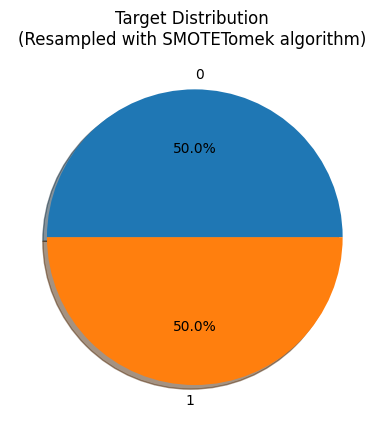

In [63]:
unique, counts = np.unique(y_res, return_counts=True)

plt.pie(counts, labels=['0', '1'], autopct='%1.1f%%', shadow=True)
plt.title('Target Distribution \n(Resampled with SMOTETomek algorithm) ')
plt.show()

# 4. Model Development

Develop Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, Histogram-Gradient Boosting Classifier, XGBClassifier, LGBM Classifier.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

**USER DEFINED FUNCTIONS**

**Table to store the evaluation metrics.**

In [41]:
# Clear all table
#models_table.drop(models_table.index, inplace=True)

models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "Precision",
                                     "Recall",
                                     "F1-score",
                                     "Cross-Validated Accuracy",
                                     "Cross-Validated Log Loss"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss


**User-defined functions for training and evaluation.**

In [42]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test)
    prediction = model.predict(x_test)

    # Calculate accuracy, precision, recall, F1-score, log loss
    test_accuracy = model.score(x_test, y_test)
    train_accuracy = model.score(x_train, y_train)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    #logloss = log_loss(y_test, prediction_prob)

    # Perform cross-validation on the test data and calculate mean accuracy and log loss
    log_losses = -cross_val_score(model, X, Y, cv=5, scoring='neg_log_loss')
    accuracies = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    avg_log_loss = log_losses.mean()
    cross_val_accuracy = accuracies.mean()

    # Print the evaluation metrics
    print("---------Debugging---------")
    print("*********Check Overfitting/Underfitting*********")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("*********Evaluating Metric*********")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Cross-Validated Accuracy: {cross_val_accuracy:.4f}")
    print(f"Cross-Validated Log Loss: {avg_log_loss:.4f}")
    
    return precision, recall, f1, cross_val_accuracy, avg_log_loss

def model_tab(models_table, model_name, model_alias, model_detail, metrics):
    new_row = {
        "Model": model_name,
        "Model Alias": model_alias,
        "Detail": model_detail,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "F1-score": metrics[2],
        "Cross-Validated Accuracy": metrics[3],
        "Cross-Validated Log Loss": metrics[4]
    }

    row_add = pd.DataFrame([new_row])

    models_table = pd.concat([models_table, row_add], ignore_index=True)
    
    return models_table

**Split the Dataset into Training and Testing**

In [38]:
X = x_res
Y = y_res

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (29021, 8) (29021,)
Test set: (3225, 8) (3225,)


## 4.1 Logistic Regression

In [43]:
# Create a model pipeline
lor1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LogisticRegression(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(lor1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Logistic Regression"
model_alias = "lor1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9434
Test Accuracy: 0.9361
*********Evaluating Metric*********
Precision: 0.9715
Recall: 0.9001
F1-score: 0.9344
Cross-Validated Accuracy: 0.9422
Cross-Validated Log Loss: 0.1700


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995


In [44]:
# Visualize the Model Pipeline
lor1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', LogisticRegression(random_state=0))])

## 4.2 Random Forest Classifier

In [45]:
# Create a model pipeline
rf1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(rf1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Random Forest"
model_alias = "rf1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 1.0000
Test Accuracy: 0.9792
*********Evaluating Metric*********
Precision: 0.9845
Recall: 0.9742
F1-score: 0.9794
Cross-Validated Accuracy: 0.9791
Cross-Validated Log Loss: 0.0813


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340


In [46]:
rf1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', RandomForestClassifier(random_state=0))])

## 4.3 Gradient Boosting Classifier

In [47]:
# Create a model pipeline
gbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(gbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9594
Test Accuracy: 0.9488
*********Evaluating Metric*********
Precision: 0.9729
Recall: 0.9246
F1-score: 0.9481
Cross-Validated Accuracy: 0.9545
Cross-Validated Log Loss: 0.1246


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643


In [77]:
gbc1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', GradientBoostingClassifier(random_state=0))])

## 4.4 Histogram-Based Gradient Boosting

In [48]:
# Create a model pipeline
hgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(hgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9830
Test Accuracy: 0.9681
*********Evaluating Metric*********
Precision: 0.9799
Recall: 0.9565
F1-score: 0.9680
Cross-Validated Accuracy: 0.9696
Cross-Validated Log Loss: 0.0831


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079


In [79]:
hgbc1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', HistGradientBoostingClassifier(random_state=0))])

## 4.5 XGBoost

In [49]:
# Create a model pipeline
xgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(xgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9959
Test Accuracy: 0.9761
*********Evaluating Metric*********
Precision: 0.9808
Recall: 0.9718
F1-score: 0.9763
Cross-Validated Accuracy: 0.9740
Cross-Validated Log Loss: 0.0723


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297


In [80]:
xgbc1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

## 4.6 Light Gradient Boosted Machine

In [50]:
# Create a model pipeline
lgbm1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9835
Test Accuracy: 0.9690
*********Evaluating Metric*********
Precision: 0.9805
Recall: 0.9577
F1-score: 0.9690
Cross-Validated Accuracy: 0.9705
Cross-Validated Log Loss: 0.0813


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330


In [81]:
lgbm1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', LGBMClassifier(random_state=0))])

# 5. Hyperparameter Tuning

Improve the performance of GBC, HGBC, XGB, and LGBM models by performing Hyperparameter Tuning.

**GBC**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for GradientBoostingClassifier
gbc_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'random_state': [0]
}

model_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=150,
    n_jobs=-1,
    verbose=3
)

gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_gbc)
])

gbc2.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0, subsample=0.8;, score=-0.099 total time=   4.0s
[CV 2/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0, subsample=0.8;, score=-0.093 total time=   3.9s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0, subsample=0.8;, score=-0.090 total time=   4.0s
[CV 4/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0, subsample=0.8;, score=-0.092 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0, subsample=0.8;, score=-0.092 total time=   3.9s
[C

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=GradientBoostingClassifier(),
                                    n_iter=150, n_jobs=-1,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'max_features': ['sqrt',
                                                                          'log2'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

**HGBC**

In [52]:
# Define the hyperparameter grid for HistGradientBoostingClassifier
hgbc_param_grid = {
    'max_iter': [50, 100, 150, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_leaf_nodes': [31, 63, 127],  # Maximum number of leaf nodes in each tree
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'l2_regularization': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term for better generalization
    'random_state': [0]
}

model_hgbc = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_distributions=hgbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=150,
    n_jobs=-1,
    verbose=3
)

hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_hgbc)
])

hgbc2.fit(x_train, y_train)



Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5, max_iter=150, max_leaf_nodes=127, min_samples_leaf=1, random_state=0;, score=-0.088 total time=   0.9s
[CV 2/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5, max_iter=150, max_leaf_nodes=127, min_samples_leaf=1, random_state=0;, score=-0.094 total time=   0.9s
[CV 3/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5, max_iter=150, max_leaf_nodes=127, min_samples_leaf=1, random_state=0;, score=-0.090 total time=   0.9s
[CV 4/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5, max_iter=150, max_leaf_nodes=127, min_samples_leaf=1, random_state=0;, score=-0.092 total time=   0.9s
[CV 5/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5, max_iter=150, max_leaf_nodes=127, min_samples_leaf=1, random_state=0;, score=-0.091 total time=   0.9s
[CV 1/5] END l2_regularization=0.1, learning_rate=0.05, max_depth=4, max_iter=200,

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=HistGradientBoostingClassifier(),
                                    n_iter=150, n_jobs=-1,
                                    param_distributions={'l2_regularization': [0.0,
                                                                               0.1,
                                                                               0.2,
                                                                               0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'max_iter': [50, 100,
                                                                      150,
                                                                      200],
                                                         'max_leaf_nodes': [31,
                                                                            63,
                                                                            127],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'random_state': [0]},
                                    scoring='neg_log_loss', verbose=3))])

**XGBC**

In [53]:
# Define the hyperparameter grid for XGBClassifier
xgbc_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_weight': [1, 2, 4],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    'random_state': [0]
}

model_xgbc = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=xgbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=150,
    n_jobs=-1,
    verbose=3,
)

xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_xgbc)
])

xgbc2.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, random_state=0, reg_alpha=0.0, reg_lambda=0.1, subsample=0.9;, score=-0.097 total time=   7.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, random_state=0, reg_alpha=0.0, reg_lambda=0.1, subsample=0.9;, score=-0.100 total time=   7.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, random_state=0, reg_alpha=0.0, reg_lambda=0.1, subsample=0.9;, score=-0.098 total time=   7.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, random_state=0, reg_alpha=0.0, reg_lambda=0.1, subsample=0.9;, score=-0.099 total time=   7.1s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=...
                                    n_iter=150, n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'gamma': [0, 0.1, 0.2,
                                                                   0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'min_child_weight': [1,
                                                                              2,
                                                                              4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

**LGBM**

In [54]:
# Define the hyperparameter grid for LGBMClassifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_samples': [1, 2, 4],  # Minimum number of data needed in a leaf
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    'random_state': [0]
}

model_lgbm = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=lgbm_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=150,
    n_jobs=-1,
    verbose=3,
)

lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),  
    ('Model', model_lgbm)
])

lgbm2.fit(x_train, y_train)



Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_samples=1, n_estimators=150, random_state=0, reg_alpha=0.3, reg_lambda=0.1, subsample=0.8;, score=-0.099 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_samples=1, n_estimators=150, random_state=0, reg_alpha=0.3, reg_lambda=0.1, subsample=0.8;, score=-0.102 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_samples=1, n_estimators=150, random_state=0, reg_alpha=0.3, reg_lambda=0.1, subsample=0.8;, score=-0.101 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_samples=1, n_estimators=150, random_state=0, reg_alpha=0.3, reg_lambda=0.1, subsample=0.8;, score=-0.100 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, min_child_samples=1, n_estimators=150, random_state=0, reg_alpha=0

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                                    n_iter=150, n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'min_child_samples': [1,
                                                                               2,
                                                                               4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

In [55]:
print("-"*30)
print("GBC")
# Print the search grid
print ('Random grid: ', gbc_param_grid, '\n')
# Retrieve the best parameters
gbc2_best_params = model_gbc.best_params_
# Print the best parameters
print ('Best Parameters: ', gbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("HGBC")
# Print the search grid
print ('Random grid: ', hgbc_param_grid, '\n')
# Retrieve the best parameters
hgbc2_best_params = model_hgbc.best_params_
# Print the best parameters
print ('Best Parameters: ', hgbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("XGBC")
# Print the search grid
print ('Random grid: ', xgbc_param_grid, '\n')
# Retrieve the best parameters
xgbc2_best_params = model_xgbc.best_params_
# Print the best parameters
print ('Best Parameters: ', xgbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("LGBM")
# Print the search grid
print ('Random grid: ', lgbm_param_grid, '\n')
# Retrieve the best parameters
lgbm2_best_params = model_lgbm.best_params_
# Print the best parameters
print ('Best Parameters: ', lgbm2_best_params, ' \n')
print("-"*30)

------------------------------
GBC
Random grid:  {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 0.9, 1.0], 'random_state': [0]} 

Best Parameters:  {'subsample': 0.9, 'random_state': 0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.1}  

------------------------------
------------------------------
HGBC
Random grid:  {'max_iter': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_leaf_nodes': [31, 63, 127], 'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 4], 'l2_regularization': [0.0, 0.1, 0.2, 0.3], 'random_state': [0]} 

Best Parameters:  {'random_state': 0, 'min_samples_leaf': 4, 'max_leaf_nodes': 127, 'max_iter': 200, 'max_depth': 5, 'learning_rate': 0.2, 'l2_regularization': 0.2}  

------------------------

Retrain the models with tuned parameters.

**GBC**

In [56]:
# Create a model pipeline
gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier(**gbc2_best_params))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(gbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9925
Test Accuracy: 0.9705
*********Evaluating Metric*********
Precision: 0.9806
Recall: 0.9608
F1-score: 0.9706
Cross-Validated Accuracy: 0.9726
Cross-Validated Log Loss: 0.0771


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080


In [76]:
gbc2

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 GradientBoostingClassifier(max_depth=6, max_features='sqrt',
                                            min_samples_leaf=4,
                                            n_estimators=200, random_state=0,
                                            subsample=0.9))])

**HGBC**

In [57]:
# Create a model pipeline
hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier(**hgbc2_best_params))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(hgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9943
Test Accuracy: 0.9758
*********Evaluating Metric*********
Precision: 0.9802
Recall: 0.9718
F1-score: 0.9760
Cross-Validated Accuracy: 0.9757
Cross-Validated Log Loss: 0.0706


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.980210,0.971796,0.975985,0.975718,0.070606


In [75]:
hgbc2

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 HistGradientBoostingClassifier(l2_regularization=0.2,
                                                learning_rate=0.2, max_depth=5,
                                                max_iter=200,
                                                max_leaf_nodes=127,
                                                min_samples_leaf=4,
                                                random_state=0))])

**XGBOOST**

In [58]:
# Create a model pipeline
xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(**xgbc2_best_params))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(xgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9937
Test Accuracy: 0.9721
*********Evaluating Metric*********
Precision: 0.9801
Recall: 0.9644
F1-score: 0.9722
Cross-Validated Accuracy: 0.9746
Cross-Validated Log Loss: 0.0739


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.980210,0.971796,0.975985,0.975718,0.070606
8,XGBoost,xgbc2,"Tuned, Scaled",0.980062,0.964439,0.972188,0.974601,0.073937


In [74]:
xgbc2

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=0.1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=4,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=0, ...))])

**LGBM**

In [59]:
# Create a model pipeline
lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier(**lgbm2_best_params))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9989
Test Accuracy: 0.9786
*********Evaluating Metric*********
Precision: 0.9791
Recall: 0.9785
F1-score: 0.9788
Cross-Validated Accuracy: 0.9785
Cross-Validated Log Loss: 0.0636


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.980210,0.971796,0.975985,0.975718,0.070606
8,XGBoost,xgbc2,"Tuned, Scaled",0.980062,0.964439,0.972188,0.974601,0.073937
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.979141,0.978541,0.978841,0.978509,0.063563


In [73]:
lgbm2

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 LGBMClassifier(colsample_bytree=0.9, learning_rate=0.2,
                                max_depth=6, min_child_samples=1,
                                n_estimators=200, random_state=0, reg_alpha=0.3,
                                reg_lambda=0.3))])

After tuning our models’ hyperparameters, we observed an improvement in cross-validated accuracy compared to the default hyperparameters. Furthermore, we observed a decrease in cross-validated log loss, indicating that our tuned models have improved performance in terms of correctly classifying pulsar candidates and increased confidence after hyperparameter tuning.

### Are we finish yet??

We can implement a voting ensemble algorithm, which involves combining multiple high-performance models to create a significantly improved and more robust model. This approach leverages the strengths of individual models to enhance the overall predictive power and generalization capability of the ensemble.

## Voting Ensemble

In [ ]:
#models_table.drop(models_table.tail(1).index, inplace=True)
#models_table

Combine RF2 + LGBM2 + HGBC2 as Voting Ensemble.

In [69]:
# Ensemble classifier
estimators = [
    ('hgbc2', HistGradientBoostingClassifier(**hgbc2_best_params)),
    ('rf2', RandomForestClassifier(random_state=0)),
    ('lgbm2', LGBMClassifier(**lgbm2_best_params))
              ]

# Create the VotingClassifier with the transformer as a preprocessing step
ensemble1 = VotingClassifier(
    estimators=estimators,
    voting="soft"
)

# Create a pipeline that applies the transformer and then the ensemble classifier
ve1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('classifier', ensemble1)
])

# Function to train and evaluate the model
metrics = train_evaluate(ve1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)

# Note for Table
model_name = "Voting Ensemble"
model_alias = "ve1"
model_detail = "HGBC2+RF2+LGBM2, Scaled, Soft Voting"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9988
Test Accuracy: 0.9802
*********Evaluating Metric*********
Precision: 0.9827
Recall: 0.9779
F1-score: 0.9803
Cross-Validated Accuracy: 0.9789
Cross-Validated Log Loss: 0.0624


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.980210,0.971796,0.975985,0.975718,0.070606
8,XGBoost,xgbc2,"Tuned, Scaled",0.980062,0.964439,0.972188,0.974601,0.073937
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.979141,0.978541,0.978841,0.978509,0.063563


In [72]:
ve1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('minmax_scaling',
                                                                   MinMaxScaler())]),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('classifier',
                 VotingClassifier(estimators=[...
                                               HistGradientBoostingClassifier(l2_regularization=0.2,
                                                                              learning_rate=0.2,
                                                                              max_depth=5,
                                                                              max_iter=200,
                                                                              max_leaf_nodes=127,
                                                                              min_samples_leaf=4,
                                                                              random_state=0)),
                                              ('rf2',
                                               RandomForestClassifier(random_state=0)),
                                              ('lgbm2',
                                               LGBMClassifier(colsample_bytree=0.9,
                                                              learning_rate=0.2,
                                                              max_depth=6,
                                                              min_child_samples=1,
                                                              n_estimators=200,
                                                              random_state=0,
                                                              reg_alpha=0.3,
                                                              reg_lambda=0.3))],
                                  voting='soft'))])

The ensemble of tuned HGBC, LGBM, and RF models showcases an enhancement in Cross-Validated Log Loss compared to the individual tuned models. However, it's important to mention that the cross-validated accuracy doesn't exhibit a significant improvement just below RF individual model.

# 6. Model Evaluation

## 6.1 Comparing Models in terms of Accuracy and Log Loss

**Accuracy**: The accuracy of a classification model represents the proportion of correct predictions it makes on the test or validation data.

**Log Loss**: Log Loss, or logarithmic loss, is a widely used metric for classification tasks, particularly in cases where probability estimates are essential. It measures the accuracy of the predicted probabilities for each class. 

In [82]:
# Filter the DataFrame to include only the relevant columns
plot_table = models_table[['Model Alias','Detail', 'Cross-Validated Accuracy', 'Cross-Validated Log Loss']]
cross_val_tab = plot_table.sort_values(by='Cross-Validated Accuracy', ascending=True)
log_loss_tab = plot_table.sort_values(by='Cross-Validated Log Loss', ascending=False)

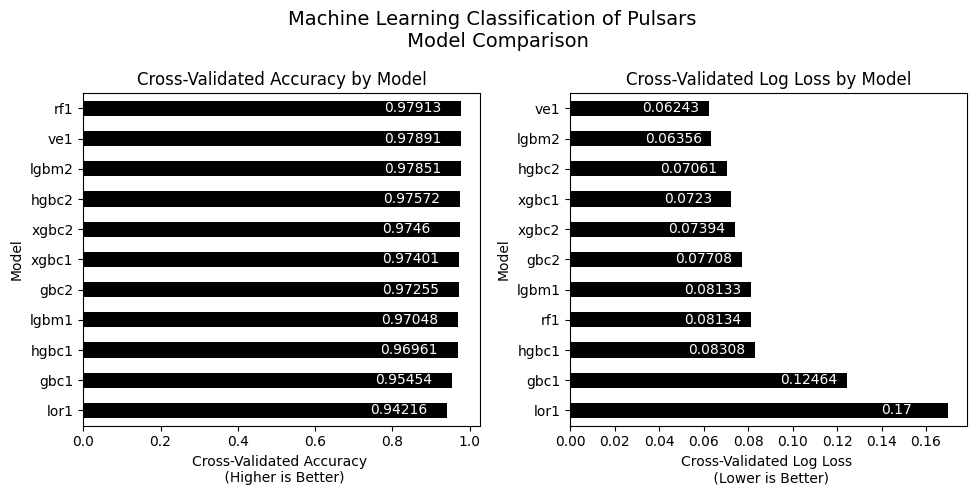

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor1,"Default, Scaled",0.971542,0.900061,0.934437,0.942163,0.169995
1,Random Forest,rf1,"Default, Scaled",0.984511,0.974249,0.979353,0.979129,0.081340
2,Gradient Boosting,gbc1,"Default, Scaled",0.972903,0.924586,0.948130,0.954537,0.124643
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.979899,0.956468,0.968042,0.969609,0.083079
4,XGBoost,xgbc1,"Default, Scaled",0.980817,0.971796,0.976286,0.974012,0.072297
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.980540,0.957695,0.968983,0.970477,0.081330
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.980601,0.960760,0.970579,0.972555,0.077080
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.980210,0.971796,0.975985,0.975718,0.070606
8,XGBoost,xgbc2,"Tuned, Scaled",0.980062,0.964439,0.972188,0.974601,0.073937
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.979141,0.978541,0.978841,0.978509,0.063563


In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the horizontal bar chart for 'Cross-Validated Accuracy'
ax1 = cross_val_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated Accuracy',
    ax=axes[0],
    color='black',
    legend=False  # Remove the legend
)
ax1.set_xlabel('Cross-Validated Accuracy \n (Higher is Better)')
ax1.set_ylabel('Model')
ax1.set_title('Cross-Validated Accuracy by Model')

# Annotate the values on the bars for 'Cross-Validated Accuracy'
for i, (v, detail) in enumerate(zip(cross_val_tab['Cross-Validated Accuracy'], cross_val_tab['Detail'])):
    ax1.text(v - 0.2, i, str(round(v, 5)), va='center', color='white')
    #ax1.text(ax1.get_xlim()[0], i, detail, va='center', ha='left', color='white', fontsize=8)

# Plot the horizontal bar chart for 'Log Loss'
ax2 = log_loss_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated Log Loss',
    ax=axes[1],
    color='black',
    legend=False  # Remove the legend
)
ax2.set_xlabel('Cross-Validated Log Loss \n (Lower is Better)')
ax2.set_ylabel('Model')
ax2.set_title('Cross-Validated Log Loss by Model')

# Annotate the values on the bars for 'Log Loss'
for i, v in enumerate(log_loss_tab['Cross-Validated Log Loss']):
    ax2.text(v - 0.03, i, str(round(v, 5)), va='center', color='white')  # Adjust the position to the left of the bar
    
# Add a suptitle for the entire figure
plt.suptitle('Machine Learning Classification of Pulsars \n Model Comparison', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

models_table

**Cross-Validated Accuracy**

In the evaluation of model performance through cross-validation, it is noteworthy that the RF1 model emerged as the top performer, exhibiting the highest Cross-Validated Accuracy at 0.979129. Following closely, the voting-ensemble model VE1 demonstrated strong performance, with a Cross-Validated Accuracy of 0.978912, and LGBM2 proved to be a competitive contender, securing the third rank with a Cross-Validated Accuracy of 0.978509.

**Cross-Validated Log Loss**

Delving into the Cross-Validated Log Loss, the voting ensemble, denoted as VE1, displayed remarkable proficiency by achieving the lowest log loss value at 0.062428, signifying its advanced probabilistic capabilities. LGBM2 maintained a strong presence by securing the second position in terms of log loss (0.063563), while HGBC2 ranked third with a log loss of 0.975718.

These results underscore the substantial benefits of employing ensemble methods, as they offer a **well-rounded** and **robust strategy** for model performance improvement. The notable supremacy of the voting ensemble in log loss and its competitive accuracy rankings exemplify its effectiveness in **harmonizing the strengths of diverse individual models**, thereby delivering more accurate and reliable probability estimates.

## 6.2 Features Importance

After developing a model, Feature Importance is a valuable tool that helps us understand the significance of each feature (or input variable) in making predictions. It provides insights into the following:

1. **Identifying Key Predictors**: Feature Importance helps us pinpoint which features have the most impact on the model's predictions. Features with higher importance values are more influential in determining the outcome.

2. **Interpretability**: Feature Importance aids in making the model more interpretable. It allows us to explain to stakeholders or end-users which factors are driving the model's decisions.

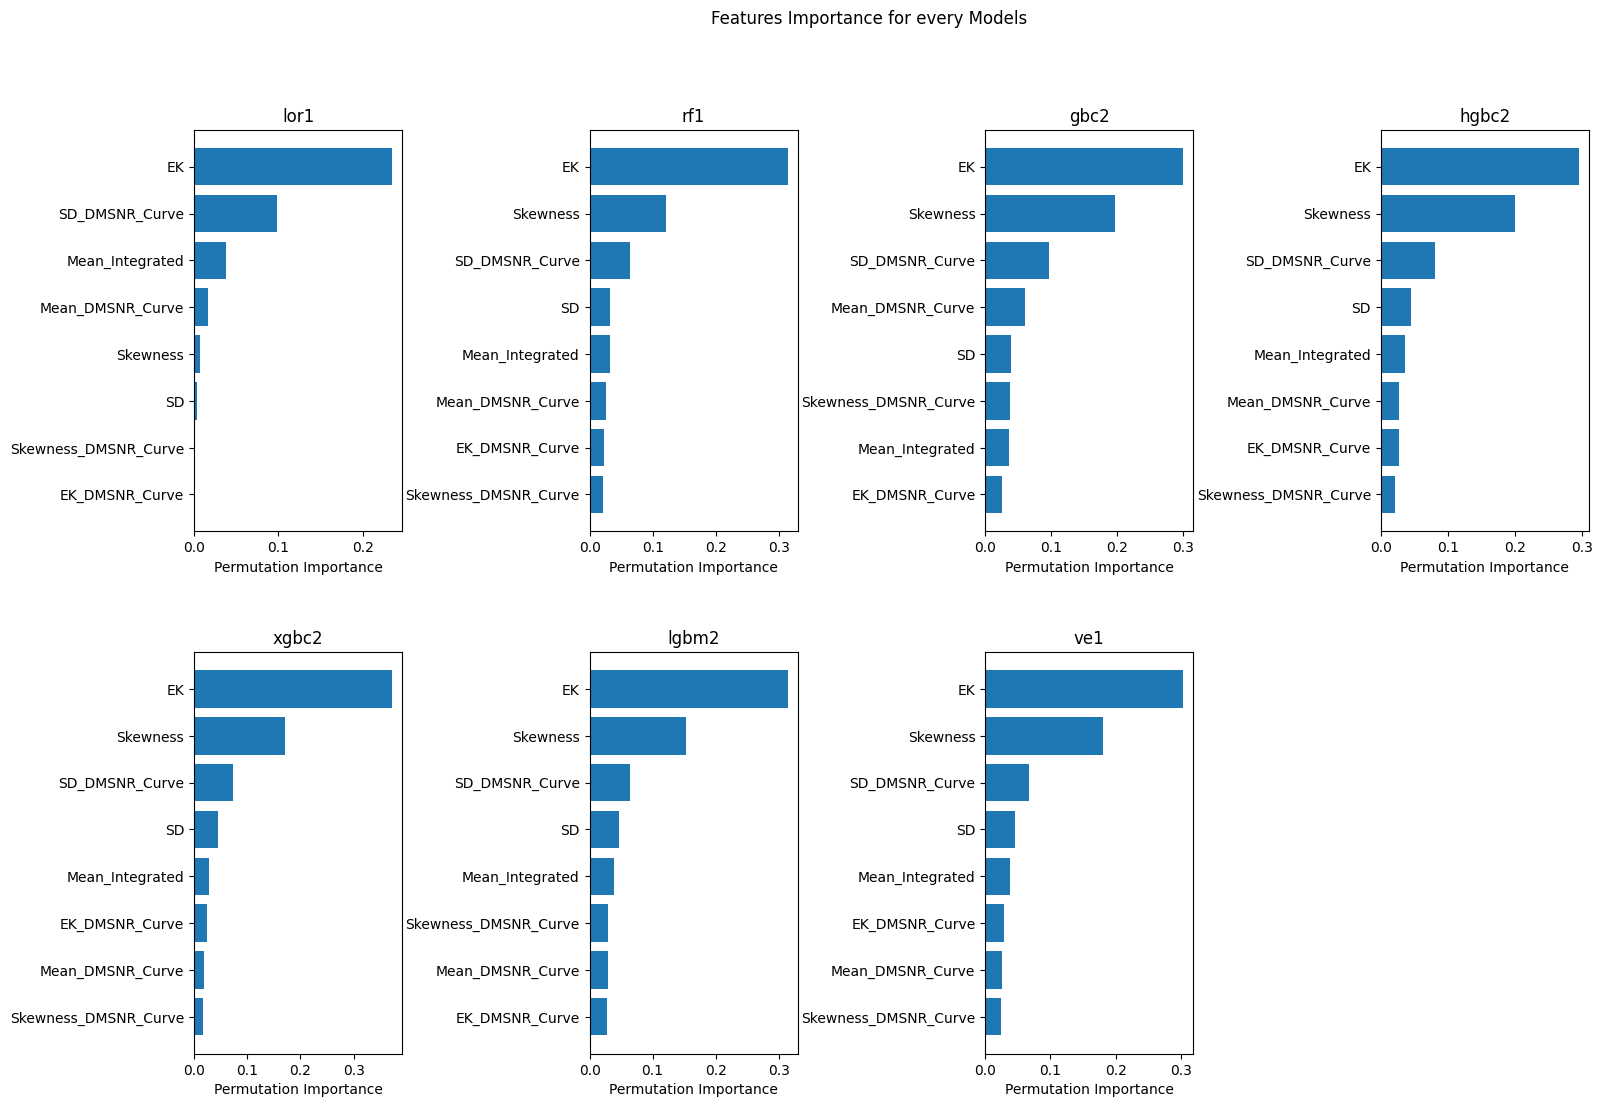

In [112]:
from sklearn.inspection import permutation_importance

models_list = [lor1, rf1, gbc2, hgbc2, xgbc2, lgbm2, ve1]
models_list_title = ['lor1', 'rf1', 'gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 've1']

# Define the number of rows and columns for the subplots
n_rows = 2  # Adjust this as needed
n_cols = 4  # Adjust this as needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.9, hspace=0.3)

# Iterate through the models and calculate permutation importances
for i, model in enumerate(models_list):
    if i >= n_rows * n_cols:  # Stop when there are no more subplots available
        break

    perm_importance = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=0)

    # Get feature names
    feature_names = x_test.columns

    # Calculate mean importance
    mean_importance = perm_importance.importances_mean

    # Sort feature indices by importance
    sorted_idx = mean_importance.argsort()

    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols

    # Plot permutation importance in the appropriate subplot
    axes[row_index, col_index].barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
    axes[row_index, col_index].set_yticks(range(len(sorted_idx)))
    axes[row_index, col_index].set_yticklabels([feature_names[i] for i in sorted_idx])
    axes[row_index, col_index].set_xlabel('Permutation Importance')
    axes[row_index, col_index].set_title(models_list_title[i])

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.suptitle("Features Importance for every Models")
plt.show()


Looking at the Feature Importance plot, it's clear that all the models agree that the `EK` feature as the most important one for making predictions in each model.

## 6.3 AUC-ROC Curve

The AUC-ROC curve (Area Under the Receiver Operating Characteristic curve) is a graphical representation used to assess and compare the performance of classification models, such as binary classifiers. 

1. **Receiver Operating Characteristic (ROC) Curve**: The ROC curve is a graph that displays the performance of a classification model across various classification thresholds. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different threshold values. The curve shows how well the model distinguishes between the positive and negative classes.

2. **Area Under the Curve (AUC)**: AUC measures the overall performance of a model. It represents the area under the ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5. The closer the AUC is to 1, the better the model's ability to discriminate between the two classes.

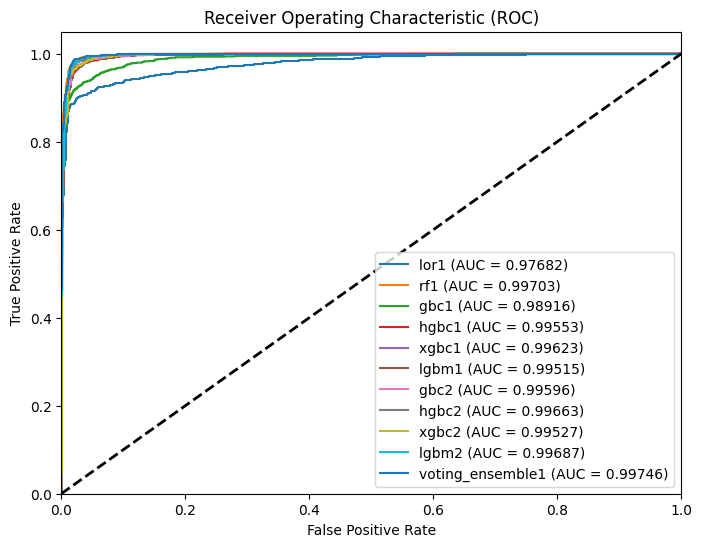

In [114]:
from sklearn.metrics import roc_curve, auc

models_list = [lor1, rf1, gbc1, hgbc1, xgbc1, lgbm1, gbc2, hgbc2, xgbc2, lgbm2, ve1]
models_list_title = ['lor1', 'rf1', 'gbc1', 'hgbc1', 'xgbc1', 'lgbm1','gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 'voting_ensemble1']

# Create an empty list to store AUC values
auc_values = []

# Define classes and labels here
# For example: classes = [0, 1]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Iterate through the models
for i, model in enumerate(models_list):
    # Get model predictions
    y_score = model.predict_proba(x_test)[:, 1]  # Adjust if necessary
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with model name from models_list_title
    plt.plot(fpr, tpr, label=f'{models_list_title[i]} (AUC = {roc_auc:.5f})')
    
    # Store AUC value
    auc_values.append(roc_auc)

# Set plot properties
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [115]:
# Print AUC values
for i, auc_val in enumerate(auc_values):
    print(f'{models_list_title[i]}: AUC = {auc_val:.5f}')

lor1: AUC = 0.97682
rf1: AUC = 0.99703
gbc1: AUC = 0.98916
hgbc1: AUC = 0.99553
xgbc1: AUC = 0.99623
lgbm1: AUC = 0.99515
gbc2: AUC = 0.99596
hgbc2: AUC = 0.99663
xgbc2: AUC = 0.99527
lgbm2: AUC = 0.99687
voting_ensemble1: AUC = 0.99746


The AUC values serve as a measure of how well each model can classify data. Models with higher AUC values excel in distinguishing between different classes. In our case, all of our models demonstrate strong AUC values, signifying their effectiveness in distinguishing between the classes. 

## 6.4 Confusion Matrix

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It helps us understand how well our model is making predictions by comparing the actual and predicted values.

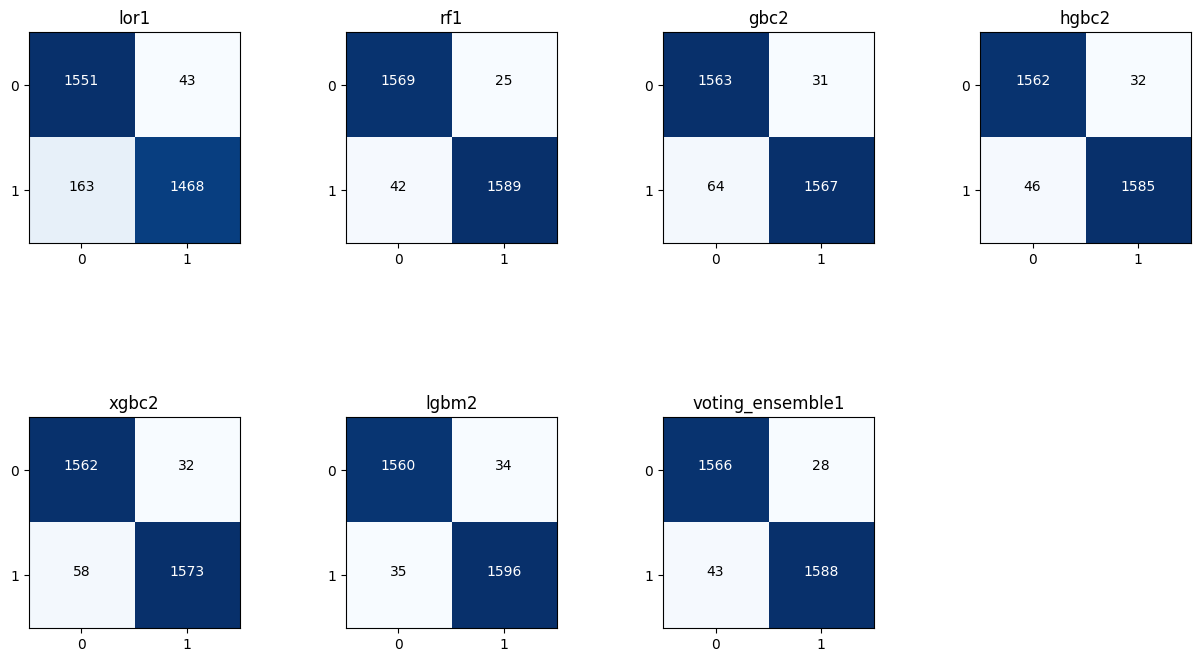

In [116]:
import itertools
from sklearn.metrics import confusion_matrix
models_list = [lor1, rf1, gbc2, hgbc2, xgbc2, lgbm2, voting_ensemble1]
models_list_title = ['lor1', 'rf1', 'gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 'voting_ensemble1']

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0)

for i, model in enumerate(models_list):
    # Predict using the model
    predict = model.predict(x_test)
    
    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, predict, labels=[0, 1])
    
    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols
    
    # Plot the confusion matrix in the appropriate subplot
    axes[row_index, col_index].imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    axes[row_index, col_index].set_title(models_list_title[i])
    tick_marks = np.arange(2)
    axes[row_index, col_index].set_xticks(tick_marks)
    axes[row_index, col_index].set_yticks(tick_marks)
    #axes[row_index, col_index].set_xticklabels(['Not Pulsar', 'Pulsar'])
    #axes[row_index, col_index].set_yticklabels(['Not Pulsar', 'Pulsar'])
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        axes[row_index, col_index].text(j, i, format(cnf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.show()

|           | Predicted Negative (0 - Not Pulsar) | Predicted Positive (1 - Pulsar) |
|-----------|-----------------------------------|-------------------------------|
| Actual Negative (0 - Not Pulsar) | True Negatives (TN)             | False Positives (FP)          |
| Actual Positive (1 - Pulsar) | False Negatives (FN)            | True Positives (TP)           |



Lets take confusion matrix for ve1. 

**Interpretation of the Confusion Matrix**:

**True Positives (TP)**: We correctly identified 1566 pulsar candidates. This shows the model's ability to accurately detect true positives.

**False Positives (FP)**: There were 28 false positives, where the model mistakenly classified non-pulsars as pulsar candidates. These could be potential false alarms.

**False Negatives (FN)**: We missed 43 actual pulsar candidates, misclassifying them as non-pulsars. This indicates cases where the model failed to identify true pulsars.

**True Negatives (TN)**: The model correctly classified 1588 non-pulsar candidates. This demonstrates its ability to accurately identify non-pulsars.


# 7. Summary

## **1. Data Gathering and Preparation:**
- **Data Sources:**
    - The HTRU2 dataset was sourced from Kaggle. The dataset contains 16,259 non-pulsar examples and 1,639 pulsar examples. Notably, the dataset exhibited class imbalance, with a 10:1 ratio between the target classes.

- **Data Wrangling Steps:**
    - A comprehensive data inspection was conducted, checking for missing values, duplicates, and data format issues.
    - To enhance the robustness of data analysis, the RobustScaler() was employed to handle potential outliers, and the MinMaxScaler() was used to standardize the data through a column transformer pipeline.
    - To solve the class imbalance issue, the SMOTETomek algorithm was strategically implemented, oversampling the minority class to achieve a balanced 1:1 dataset. This was carried out while vigilantly ensuring that overfitting or bias introduction did not occur.

## **2. Exploratory Data Analysis:**
- **Summary Statistics:**
    - The data distribution for both pulsar and non-pulsar data was explored using eight features extracted from Integrated Profile and DM-SNR curves.
- **Data Visualizations:**
    - Employing KDE plots, boxplots, and pairplots, insightful data visualizations were created to better understand the characteristics of the dataset.

## **3. Modelling:**
- **Baseline Model (1):**
    - The baseline model employed was Logistic Regression (LOR).

- **Ensemble Models (4):**
    - Ensemble models included the Random Forest Classifier (RF), Gradient Boosting Classifier (GBC), Histogram-Gradient Boosting Classifier (HGBC), XGBoost Classifier (XGBC), and Light Gradient Boosted Machine (LGBM).
    
- **Voting Ensemble (1):**
    - The power of ensemble learning was harnessed through a soft voting algorithm that combined HGBC, RF, and LGBM.

- **Modeling Pipeline:**
    - A modeling pipeline was constructed, consisting of both transformers and models.

- **Hyperparameter Tuning:**
    - For further model refinement, hyperparameter tuning was performed on GBC, HGBC, XGBC, and LGBM, employing RandomizedSearchCV() with 750 iterations for each model. This optimization process resulted in improved cross-validated accuracy and log-loss metrics when compared to models with default parameters.

- **5-Fold Cross Validation:**
    - A 5-fold cross-validation strategy was adopted to validate and verify the model's performance, ensuring the reliability of the evaluation metrics.

## **4. Evaluation:**
- **Cross-Validated Log Loss:**
    - The log loss was measured as a gauge of the model's confidence when making predictions. Lower log loss values indicate higher prediction confidence.

- **Cross-Validated Accuracy:**
    - Accuracy was assessed to evaluate the model's ability to correctly classify instances into their respective classes.

- **AUC-ROC:**
    - The AUC-ROC metric was utilized to evaluate the model's ability to distinguish between pulsar and non-pulsar instances effectively.

- **Confusion Matrix:**
    - Visualizations of confusion matrices provided a clear assessment of each model's accuracy and its ability to correctly classify data points.
    
## **5. Key Insights:**
- **Performance of Tree-Based Boosting Algorithms:**
    - Notably, LGBM, HGBC, GBC, and XGBC outperformed the baseline model, Logistic Regression. This superior performance can be attributed to the nature of these tree-based boosting algorithms, which excel at capturing intricate patterns in the data, thanks to their ensemble of decision trees and sequential learning.
    - In further comparison, both LGBM and HGBC demonstrated relatively better performance when contrasted with other tree-based boosting algorithms, such as GBC and XGBC. The reasons behind this performance discrepancy could potentially relate to dataset size, algorithm-specific optimizations, or the nature of the features.
    - However, when evaluating these tree-based models against the Random Forest, it is evident that Random Forest achieved the highest overall accuracy. This discrepancy arises from the distinct approach employed by Random Forest, which is a Bagging ensemble technique. In contrast, Boosting methods like LGBM, HGBC, GBC, and XGBC focus on improving model performance by sequentially correcting the errors of previous models, potentially making them more sensitive to data variations.

- **Voting Ensemble:**
    - The introduction of a soft voting ensemble, which combined LGBM, HGBC, and RF, resulted in a significantly diversified model. This ensemble effectively harnessed the unique strengths of each individual model and created a more robust and versatile predictor. The ensemble model achieved improved log loss and accuracy metrics when compared to the individual models, underscoring the effectiveness of combining different approaches in ensemble learning.

# 8. Recommendation

1. **Collect More Training Data:**
   - To enhance the performance of our pulsar classification models, it's crucial to collect a more extensive and balanced training dataset. Pulsar candidates can be relatively rare, and imbalanced datasets may lead to biased model predictions. A larger, more balanced dataset will improve the models' ability to detect pulsars accurately.

2. **Feature Engineering:**
   - Explore advanced feature engineering techniques to extract more meaningful information from the signal data of pulsars. Consider the mathematical characteristics of pulsar signals and how they can be translated into informative features for our models. This may involve time-domain and frequency-domain analysis, autocorrelation, Fourier transforms, and other signal processing techniques.

# 9. References

Choquenaira Florez, A. Y., Sanchez Vinces, B. V., Roca Arroyo, D. C., Chire Saire, J. E., & Franco, P. B. (2020). Machine learning pipeline for pulsar star dataset. arXiv preprint arXiv:2005.01208.

Debesai, S., Gutierrez, C., & Koyluoglu, N. U. (2020). Application of machine learning methods to identify and categorize radio pulsar signal candidates. Retrieved from https://cs229.stanford.edu/proj2020spr/report/Debesai_Gutierrez_Koyluoglu.pdf

Dincer, B. (2020). Pulsar classification for class prediction [Data set]. Kaggle. https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction/data

Lee, E., Rustam, F., Aljedaani, W., Ishaq, A., Rupapara, V., & Ashraf, I. (2021). Predicting Pulsars from Imbalanced Dataset with Hybrid Resampling Approach. Advances in Astronomy, 2021, 4916494. https://doi.org/10.1155/2021/4916494

Lin, H., Li, X., & Luo, Z. (2020). Pulsar detection by machine learning with very few features. Monthly Notices of the Royal Astronomical Society, 000(1), 1-13. https://arxiv.org/pdf/2002.08519v1.pdf.

Janmpia. (2023, March 22). Animated competition explanation [Online forum post]. Kaggle. https://www.kaggle.com/code/janmpia/animated-competition-explanation

---

### THANK YOU FOR REVIEWING MY NOTEBOOK!

Your feedback is highly appreciated. If you have any questions, suggestions, or would like to collaborate, please feel free to contact me:

- **LinkedIn**: [https://www.linkedin.com/in/hazmannaim/](https://www.linkedin.com/in/hazmannaim/)
- **GitHub**: [https://github.com/HazmanNaim](https://github.com/HazmanNaim)
- **Kaggle**: [https://www.kaggle.com/hazmannaim](https://www.kaggle.com/hazmannaim)

Thank you for your time and interest in my work. Your input is valuable, and I look forward to connecting with you.